# Spam or ham classification technique using NLP 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
! pip install scikit-learn

In [49]:
df=pd.read_csv("spam.tsv", sep='\t')

In [50]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [51]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [52]:
len(df)

5572

In [53]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Balannce data 

In [54]:
ham=df[df['label']=='ham']

In [55]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [64]:
spam=df[df['label']=='spam']

In [65]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [66]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [74]:
ham=ham.sample(spam.shape[0])

In [76]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [77]:
data=ham.append(spam,ignore_index=True)

In [78]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


# Exploratory data analysis

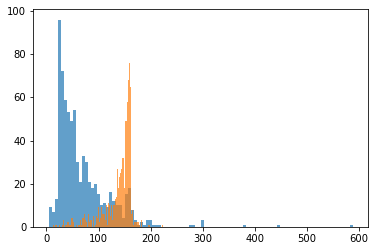

In [96]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

# data preparation

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
data.head()

,label,message,length,punct
0,ham,Send me your resume:-),22,3
1,ham,Imagine Life WITHOUT ME... see.. How fast u ar...,119,16
2,ham,U wake up already? Thanx 4 e tau sar piah it's...,58,3
3,ham,"Oops, I'll let you know when my roommate's done",47,3
4,ham,"Awesome, text me when you're restocked",38,2


In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0,
                                                   shuffle=True, stratify=data['label'])

In [ ]:
#bow vectorizer

In [109]:
vectorizer=TfidfVectorizer()

In [110]:
X_train=vectorizer.fit_transform(X_train)

In [111]:
X_train.shape

(1045, 3611)

In [112]:
X_train

<1045x3611 sparse matrix of type '<class 'numpy.float64'>'
	with 17549 stored elements in Compressed Sparse Row format>

# pipeline and RF

In [123]:
clf=Pipeline([('tfidf', TfidfVectorizer()) , ('clf',RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [124]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [125]:
y_pred=clf.predict(X_test)

In [129]:
confusion_matrix(Y_test, y_pred)

array([[224,   1],
       [ 23, 201]], dtype=int64)

In [130]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       225
        spam       1.00      0.90      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [131]:
accuracy_score(Y_test, y_pred)

0.9465478841870824

In [133]:
clf.predict(["how are you ababy  whatsapp?"])

array(['ham'], dtype=object)